In [213]:
#The output of CCPP (PE) depends on several factors, such as 
#ambient temperature (AT), 
#exhaust steam pressure (V), 
#atmospheric pressure (AP), 
#and relative humidity (RH).
#https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

In [ ]:
#Which feature/s has/have the highest effect on power output (PE)?

In [133]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [134]:
xls = pd.ExcelFile('Folds5x2_pp.xlsx')
df1 = pd.read_excel(xls, 'Sheet1')
df1

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [135]:
df1.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [136]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [137]:
df1.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [138]:
df1.isna().sum().sum()

0

In [139]:
df1.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

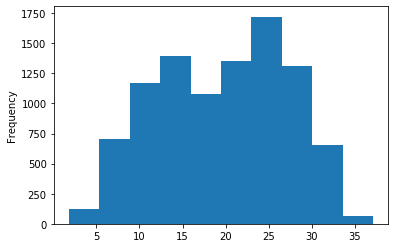

In [140]:
df1['AT'].plot.hist()

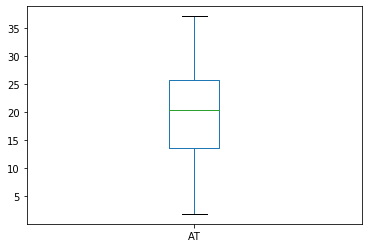

In [141]:
df1['AT'].plot(kind='box')

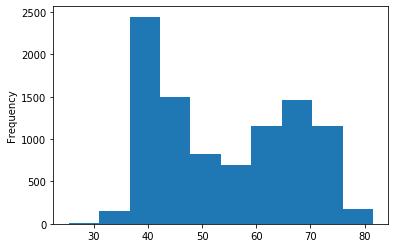

In [142]:
df1['V'].plot.hist()

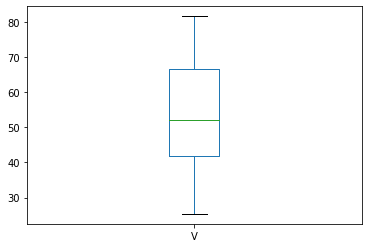

In [143]:
df1['V'].plot(kind='box')

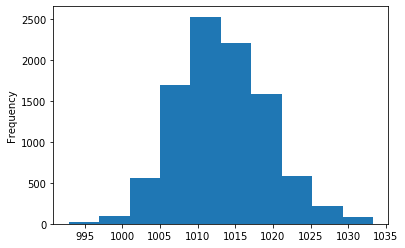

In [144]:
df1['AP'].plot.hist()

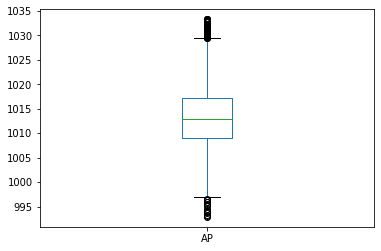

In [145]:
df1['AP'].plot(kind='box')

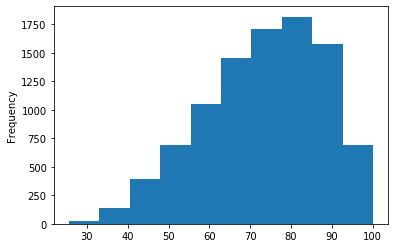

In [146]:
df1['RH'].plot.hist()

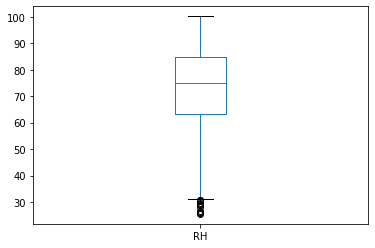

In [147]:
df1['RH'].plot(kind='box')

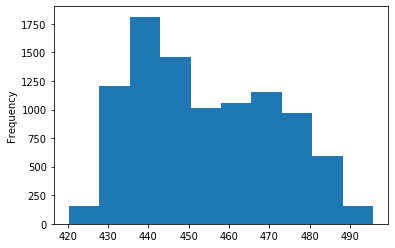

In [148]:
df1['PE'].plot.hist()

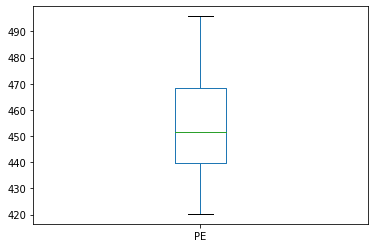

In [149]:
df1['PE'].plot(kind='box')

In [150]:
#AP AND RH needs cleaning of outliers

In [151]:
Q1 = df1.quantile(.25)
Q3 = df1.quantile(.75)
IQR = Q3-Q1
IQR

AT    12.2100
V     24.8000
AP     8.1600
RH    21.5025
PE    28.6800
dtype: float64

In [152]:
Q3+1.5*IQR

AT      44.03500
V      103.74000
AP    1029.50000
RH     117.08375
PE     511.45000
dtype: float64

In [153]:
Q1-1.5*IQR

AT     -4.80500
V       4.54000
AP    996.86000
RH     31.07375
PE    396.73000
dtype: float64

In [154]:
df1['AP']=np.where(df1['AP']>1029.50000,1029.50000,df1['AP'])
df1['AP']=np.where(df1['AP']<996.86000,996.86000,df1['AP'])
df1['RH']=np.where(df1['RH']<31.07375,31.07375,df1['RH'])

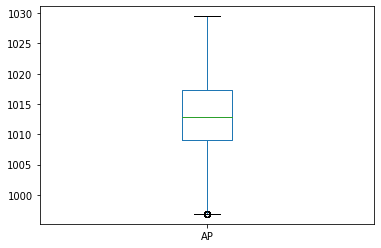

In [155]:
df1['AP'].plot(kind='box')

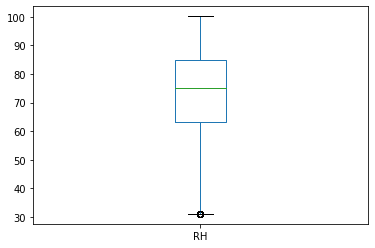

In [156]:
df1['RH'].plot(kind='box')

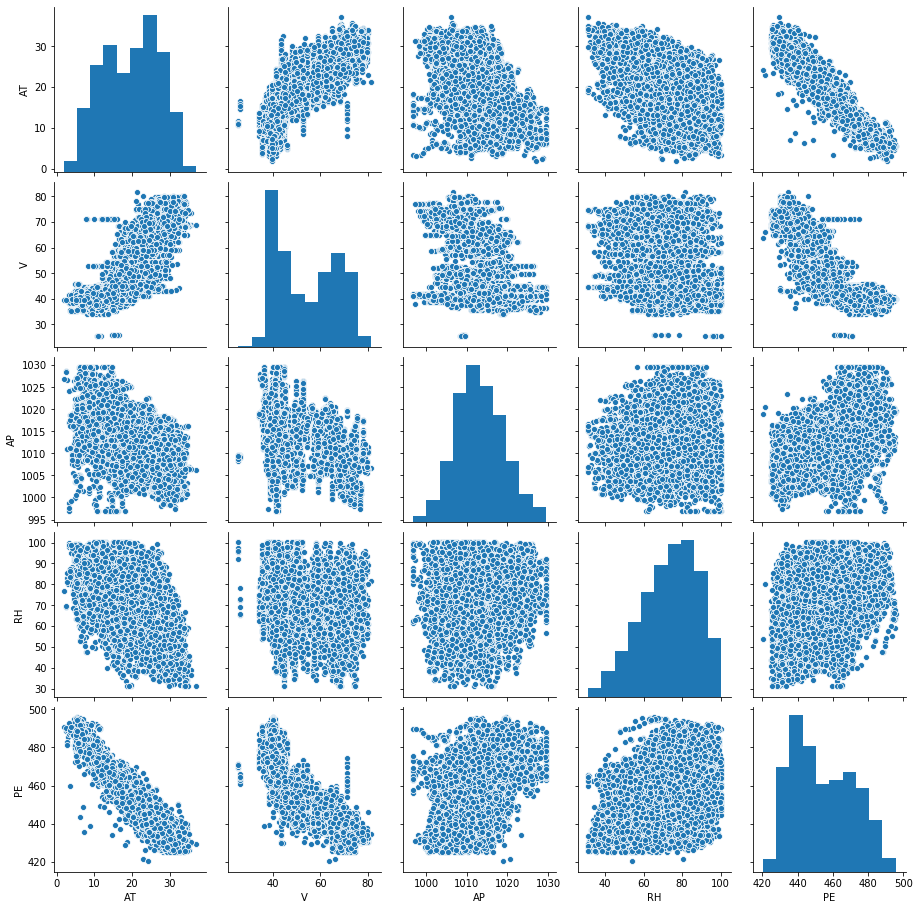

In [157]:
sns.pairplot(df1)

In [158]:
df1.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.509225,-0.542531,-0.948128
V,0.844107,1.000000,-0.415254,-0.312135,-0.869780
AP,-0.509225,-0.415254,1.000000,0.100841,0.520323
RH,-0.542531,-0.312135,0.100841,1.000000,0.389782
PE,-0.948128,-0.869780,0.520323,0.389782,1.000000


In [159]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [160]:
at = df1[['AT']]
pe = df1[['PE']]
print(at)
pe

         AT
0     14.96
1     25.18
2      5.11
3     20.86
4     10.82
...     ...
9563  16.65
9564  13.19
9565  31.32
9566  24.48
9567  21.60

[9568 rows x 1 columns]


,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90
...,...
9563,460.03
9564,469.62
9565,429.57
9566,435.74


In [161]:
X_train, X_test, y_train, y_test = train_test_split(at,pe)

In [162]:
X_train

,AT
5303,22.59
4245,9.32
8663,24.17
88,18.23
3786,33.24
...,...
2509,30.14
6484,16.36
8788,14.02
4641,24.43


In [163]:
y_train

,PE
5303,444.60
4245,481.88
8663,442.62
88,459.12
3786,435.50
...,...
2509,426.91
6484,461.62
8788,465.93
4641,440.99


In [164]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7176, 1) (7176, 1) (2392, 1) (2392, 1)


In [165]:
model = LinearRegression()

In [166]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
predicted = model.predict(X_test)

In [168]:
expected = y_test

In [169]:
print(np.sqrt(mean_squared_error(expected, predicted)))

5.317418126916106


In [170]:
r2_score(expected,predicted)

0.9036105868994095

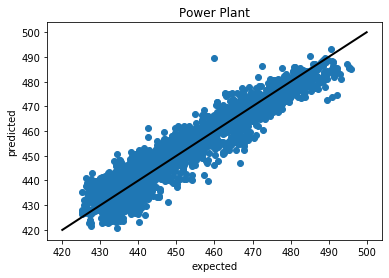

In [171]:
fig, ax = plt.subplots()

ax.scatter(expected, predicted)
plt.plot([420, 500], [420, 500], color='k', linestyle='-', linewidth=2)

ax.set_title('Power Plant')
ax.set_xlabel('expected')
ax.set_ylabel('predicted')

plt.show()

In [172]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,at,pe,cv=5,scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

5.426020714437348

In [199]:
feature_cols = ['AT', 'V', 'AP', 'RH']

In [173]:
x = pd.DataFrame(df1[['AT', 'V', 'AP', 'RH']])#date,text,location is not structured data, feature engineering required
x

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [174]:
y = pd.Series(df1['PE'])
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64

In [175]:
print(x.shape)
print(y.shape)

(9568, 4)
(9568,)


In [176]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [177]:
model2 = LinearRegression()

In [178]:
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
predicted2 = model2.predict(X_test)
expected2 = y_test

In [180]:
print(np.sqrt(mean_squared_error(expected2, predicted2)))

4.441603592816472


In [181]:
print(r2_score(expected2,predicted2))

0.9325515796517251


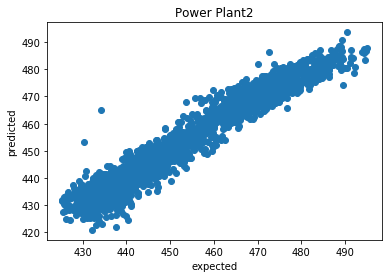

In [182]:
fig, ax = plt.subplots()
ax.scatter(expected2, predicted2)
ax.set_title('Power Plant2')
ax.set_xlabel('expected')
ax.set_ylabel('predicted')

plt.show()

In [183]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2,at,pe,cv=5,scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

5.426020714437348

In [184]:
from sklearn.tree import DecisionTreeRegressor 

In [189]:
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [186]:
treereg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [214]:
treescores = cross_val_score(treereg,x,y,cv=5,scoring='neg_mean_squared_error')
np.mean(np.sqrt(-treescores))

5.196793334772761

In [216]:
predicted3 = treereg.predict(X_test)
expected3 = y_test

In [217]:
print(np.sqrt(mean_squared_error(expected3, predicted3)))

4.881311013342529


In [218]:
print(r2_score(expected3,predicted3))

0.9185361087990037


In [195]:
max_depth_range = list(range(1, 20))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, x, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

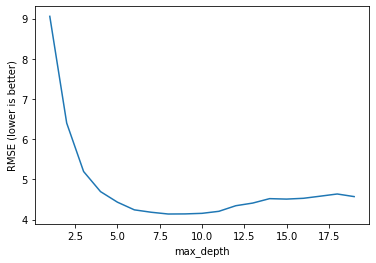

In [196]:
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [197]:
treereg = DecisionTreeRegressor(max_depth=7, random_state=1)
treereg.fit(x, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [200]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,AT,0.941151
1,V,0.044897
2,AP,0.007336
3,RH,0.006616


In [202]:
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_powerplant.dot', feature_names=feature_cols)

In [203]:
#!dot -Tpng tree_vehicles.dot -o tree_powerplant.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [204]:
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(x, y)
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_powerplant2.dot', feature_names=feature_cols)

In [207]:
from sklearn.ensemble import RandomForestRegressor

In [209]:
rfreg = RandomForestRegressor(n_estimators=150, max_features=4, oob_score=True, random_state=1)
rfreg.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)

In [211]:
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_})

,feature,importance
0,AT,0.902399
1,V,0.060150
2,AP,0.019613
3,RH,0.017837


In [219]:
# Compute the out-of-bag R-squared score.
print((rfreg.oob_score_))

# Find the average RMSE.
scores = cross_val_score(rfreg, x, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.9639115469408498


3.266664469694253

In [220]:
predicted4 = rfreg.predict(X_test)
expected4 = y_test
print('RMSE',np.sqrt(mean_squared_error(expected4, predicted4)))
print('R2 score',r2_score(expected4,predicted4))

RMSE 1.1335278165552232
R2 score 0.9956070470120659


In [ ]:
#Conclusion:
#AT is the main contributing factor to optimising PE, with an R2 score of .93. With more advanced modellings,
#namely adding more features, decision tree, and random forest models, the RMSE and R2 scores only improved slightly.
#Thus, a simple linear regression model approach would suffice to quickly predict the power plant's output based on 
#the operating ambient temperature.